<center>
<font size='7' style="color:#0D47A1">  <b>SPELL CHECKER</b></font>
</center>

<hr style= "height:3px;">
<br>

Look at the following example of KNN from sklearn:

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

Automatically created module for IPython interactive environment


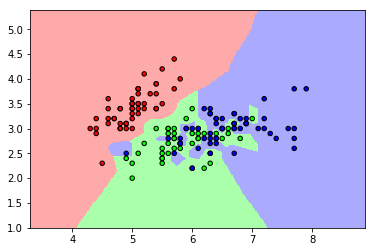

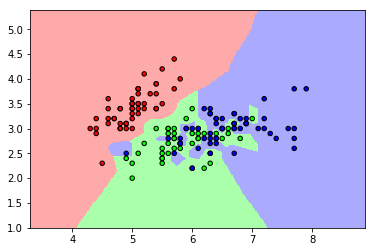

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=1, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


plt.show()

Describe the difference in the images if the number of neighbours is one?

Change the code to use only one neighbour, is that what you predicted?

This is one exercise from a course in NU.

<br>
<font size='5' style="color:#4CAF50">  <b>Nearest Neighbor Spell Checker</b></font>

The combination of a distance measure for words and the word list from the dictionary are all you need to make a simple nearest-neighbor spell-corrector.
Let $L=\{l_1,\cdots,l_n\}$ be the list of words and $w$ be the word you are spell checking. 

Define $d(a,b)$ as the Levenshtein distance between strings $a$ and  $b$ (I included below the pseudo code). Then, the closets word in the dictionary to our word is the one with the lowest distance to that word.

$L=argmin_{l\in L}(d(l,w))$

If we assume that the closest word in the dictionary is the one to use for correcting, then this is all we need for spell checker.

Given a sentece like: 'My doeg haz gleas', simply find the closets dictionary word to each of the words in the sentence. If the distance to the closest word is 0, the word must be spelled right. If the closest dictionary word is not 0 steps away, then substitute the closest dictionary word in and you'll get 'My dog has fleas'. Or so we hope.


Pseudo code for Levenshtein distance, variant by Wagner and Fischer.








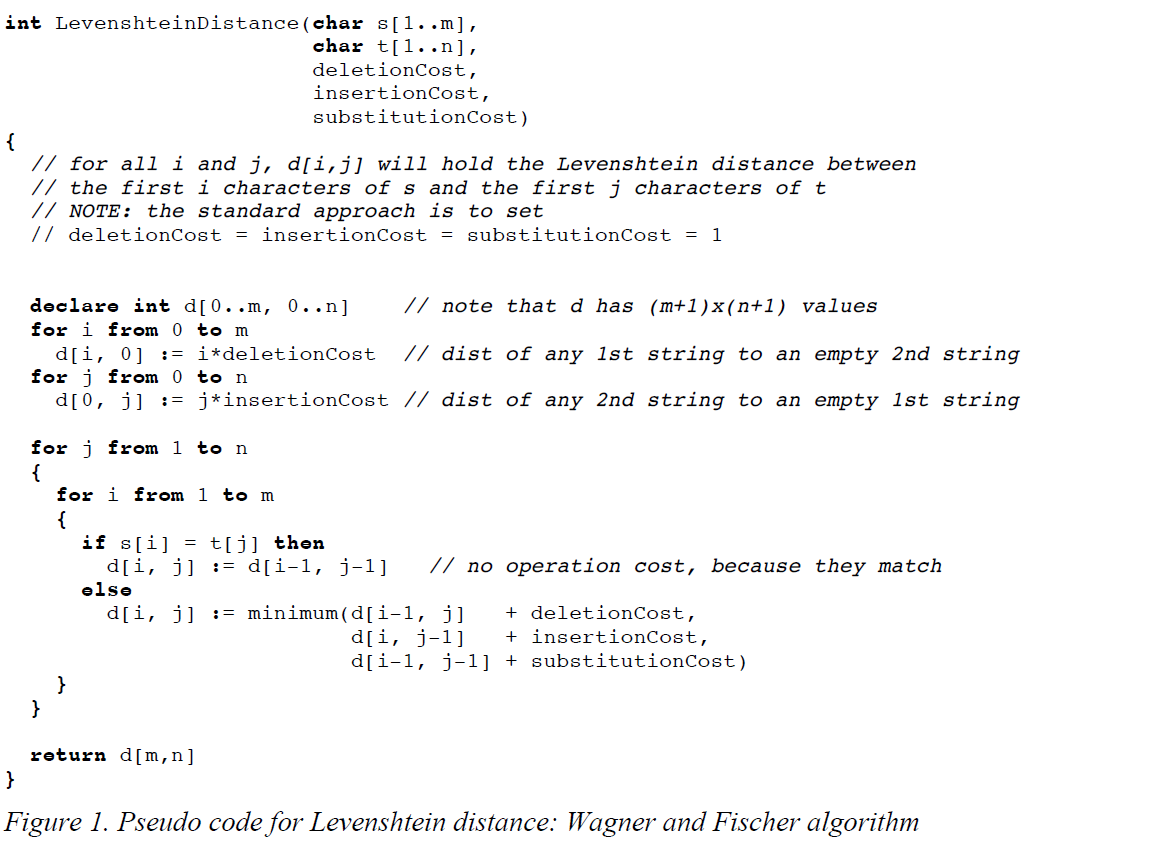

In [1]:
from IPython.display import Image
Image('Levenshtein.png')

<br>
<font size='5' style="color:#4CAF50">  <b>Getting a dictionary</b></font>

The 12 dicts project http://wordlist.aspell.net/12dicts/ has several variant dictionaries of English, download version 6: 12dicts-6.0.2.zip


<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>To Do</b></font>

Write a function that finds the closest word in a dictionary to a given  input string, call it 'find_closest_word'. This function should call the 'levenshtein_distance' function.

Use your function to correct the following statements:

In [ ]:
"Thr coverage about me in the @nytimes and the @washingtonpost gas been so false and angry that the times actually apologized" (Trump tweet, January 28)

In [ ]:
— "Despite the constant negative press covfefe" (deleted Trump tweet, May 30)

In [ ]:
'Can I haz book?'

In [ ]:
"We don't need no education"

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Extra Points</b></font>

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>A better distance measure?</b></font>


An edit distance measure that uses the distance on the QWERTY keyboard as the substitution cost function.
Ignore capitalization. 
Distance between keys is Manhattan distance, measured by difference in rows+difference in columns.

Let d(x,y ) be the distance function. For example: d('Q','q')=0, d('G','B')=1, d('Q','d')=3 since 'd' is two columns to the right and 1 row down from 'Q'. Consider only alphanumeric characters. 

Write an edit distance that uses this substitution cost function in place of a substitution cost.





Use your function to correct the following statements:

In [ ]:
"Thr coverage about me in the @nytimes and the @washingtonpost gas been so false and angry that the times actually apologized" (Trump tweet, January 28)

In [ ]:
— "Despite the constant negative press covfefe" (deleted Trump tweet, May 30)

In [ ]:
'Can I haz book?'

In [ ]:
"We don't need no education"

References: 

    Here is the definition: 
    https://en.wikipedia.org/wiki/Levenshtein_distance
    
    
    It helps to see it in action on a matrix: 
    https://people.cs.pitt.edu/~kirk/cs1501/Pruhs/Spring2006/assignments/editdistance/Levenshtein%20Distance.htm
